In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

['BBB', 'BBR', 'BRB', 'BRR', 'RBB', 'RBR', 'RRB', 'RRR'] ['BBB', 'BBR', 'BRB', 'BRR', 'RBB', 'RBR', 'RRB', 'RRR']


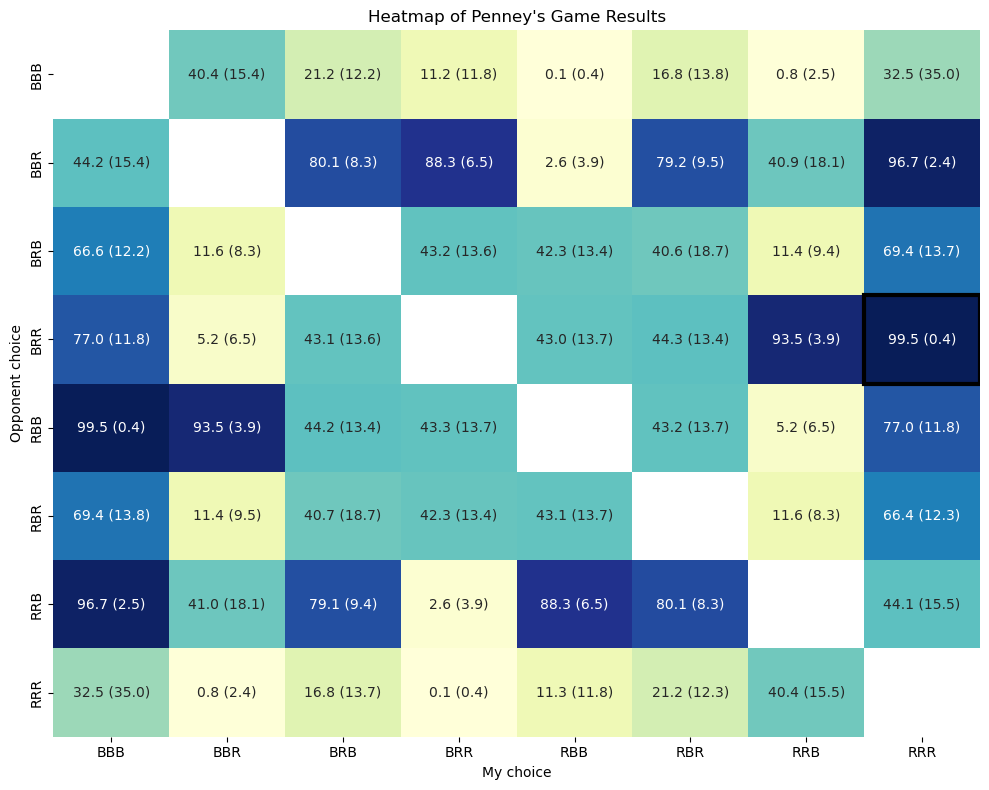

In [14]:
# Step 1: Load the data
df = pd.read_csv("C:/Users/kmand/DATA 440/Penney-Game/outputs/scoring_analysis", converters = {'p1': str, 'p2' : str})
df["p1"] = df["p1"].str.replace('0', 'B').str.replace('1', 'R')
df["p2"] = df["p2"].str.replace('0', 'B').str.replace('1', 'R')

# Step 2: Compute total tricks and win/draw rates
df["total_tricks"] = df["p1_wins_tricks"] + df["p2_wins_tricks"] + df["draws_tricks"]
df["p1_trick_win_rate"] = df["p1_wins_tricks"] / df["total_tricks"]
df["draw_trick_rate"] = df["draws_tricks"] / df["total_tricks"]

# Step 3: Create a pivot table with formatted annotations
# Format: "P1% (Draw%)"
df["annotation"] = df.apply(lambda row: f'{row["p1_trick_win_rate"]*100:.1f} ({row["draw_trick_rate"]*100:.1f})', axis=1)

# Get unique p1 and p2 combinations for axes
p1_values = sorted(df["p1"].unique())
p2_values = sorted(df["p2"].unique())

# Create a matrix of annotations
annotation_matrix = pd.DataFrame(index=p1_values, columns=p2_values)
print(p1_values, p2_values)

# Fill in the matrix with our formatted annotations
for _, row in df.iterrows():
    annotation_matrix.loc[row["p1"], row["p2"]] = row["annotation"]

# Also create a matrix of numerical values for coloring (just the win rate)
value_matrix = df.pivot(index="p1", columns="p2", values="p1_trick_win_rate")

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Step 1: Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(value_matrix, annot=annotation_matrix, fmt='', cmap="YlGnBu", cbar=False)

# Step 2: Find the max value position(s)
# For one box: highest value in whole matrix
max_val = value_matrix.max().max()
result = (value_matrix == max_val)

for (row_idx, col_idx), is_max in result.stack().items():
    if is_max:
        # Step 3: Draw a rectangle around the cell
        ax.add_patch(patches.Rectangle((value_matrix.columns.get_loc(col_idx), 
                                        value_matrix.index.get_loc(row_idx)),
                                       1, 1, fill=False, edgecolor='black', lw=3))

# Optional: Titles and labels
plt.title("Heatmap of Penney's Game Results")
plt.ylabel("Opponent choice")
plt.xlabel("My choice")
plt.tight_layout()
plt.show()


In [ ]:
#MAKE BLACK BOX